# Analisis Data PGB PDB

## Load, Clean dan Review Data

In [124]:
import pandas as pd
# Tampilkan semua kolom dan baris
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [125]:
df = pd.read_csv("https://raw.githubusercontent.com/nurfianqodar/pgb-pdb/refs/heads/main/data.csv")

In [126]:
df_clean = df.drop(columns=["no", "status", "keterangan", "waktu"]).dropna()

In [127]:
df_clean.sample(5)

,tanggal,isolat,u,diameter_1,diameter_2,diameter_3,diameter_4
307,8/4/2025,FK-5,3.0,44.3,42.7,37.9,34.5
108,7/31/2025,FK-5,4.0,24.0,28.5,29.1,36.0
209,8/2/2025,FK-5,5.0,39.5,39.6,38.4,38.5
214,8/2/2025,FK-6,5.0,33.4,33.4,31.7,32.1
168,8/1/2025,FK-1,4.0,39.2,40.2,36.7,35.8


In [128]:
df_melted = df_clean.melt(
    id_vars=["tanggal", "isolat", "u"],
    value_vars=["diameter_1", "diameter_2", "diameter_3", "diameter_4"],
    var_name="diameter_n",
    value_name="diameter")
df_melted["u"] = df_melted["u"].astype(int)
df_melted["tanggal"] = pd.to_datetime(df_melted["tanggal"])
df_melted = df_melted.sort_values(by=["isolat", "u", "diameter_n", "tanggal"])
df_melted["delta"] = df_melted.groupby(["isolat", "u", "diameter_n"])["diameter"].diff()
df_melted = df_melted.fillna(0)
df_melted = df_melted.reset_index().drop(columns="index", axis=0)
df_melted.head(7)

,tanggal,isolat,u,diameter_n,diameter,delta
0,2025-07-29,FK-1,1,diameter_1,3.3,0.0
1,2025-07-30,FK-1,1,diameter_1,13.9,10.6
2,2025-07-31,FK-1,1,diameter_1,24.1,10.2
3,2025-08-01,FK-1,1,diameter_1,33.7,9.6
4,2025-08-02,FK-1,1,diameter_1,43.1,9.4
5,2025-08-03,FK-1,1,diameter_1,53.6,10.5
6,2025-08-04,FK-1,1,diameter_1,58.6,5.0


In [129]:
df_final = df_melted.groupby(
        by=["isolat","tanggal",],
    ).agg({
        "diameter": "mean",
        "delta": "mean"
    }).reset_index()

df_final.sample(5)

,isolat,tanggal,diameter,delta
24,FK-5,2025-08-01,31.735,7.475
29,FK-6,2025-07-31,14.540,9.155
40,FP-2,2025-07-29,4.330,0.000
44,FP-2,2025-08-02,41.425,8.200
23,FK-5,2025-07-31,24.260,7.935


## Ringkasan Statistika

In [130]:
df_melted[["isolat", "tanggal", "diameter", "delta"]].groupby(by=["isolat", "tanggal"]).describe()

diameter                                                  \
                     count    mean        std   min     25%    50%     75%   
isolat tanggal                                                               
FK-1   2025-07-29     20.0   5.190   1.739298   3.3   3.775   5.05   5.925   
       2025-07-30     20.0  16.435   2.540674  12.2  14.350  16.65  18.750   
       2025-07-31     20.0  27.750   3.215342  24.1  25.025  27.40  29.575   
       2025-08-01     20.0  37.270   3.665357  31.8  34.475  36.65  39.450   
       2025-08-02     20.0  48.720   4.347244  42.6  45.500  48.35  51.950   
       2025-08-03     20.0  57.120   4.068311  46.8  54.550  57.05  59.075   
       2025-08-04     20.0  62.190   7.460979  44.1  59.400  61.95  66.750   
FK-3   2025-07-29     20.0   5.070   1.095973   3.3   4.350   5.15   5.725   
       2025-07-30     20.0  15.065   1.628779  12.4  13.875  14.65  16.350   
       2025-07-31     20.0  26.835   6.480601  19.7  23.125  24.60  28.225   
       2025-08-01     20.0  37.125   7.987021  29.7  32.050  33.70  38.250   
       2025-08-02     16.0  50.625  12.919933  40.1  43.150  44.60  52.925   
       2025-08-03     20.0  53.785  11.311069  38.9  49.075  52.75  55.075   
       2025-08-04     20.0  52.855   6.682772  40.9  48.925  53.55  57.575   
FK-4   2025-07-29     20.0   4.510   1.426405   2.8   3.375   3.95   6.025   
       2025-07-30     20.0  10.800   4.410872   4.3   6.625  11.30  14.975   
       2025-07-31     20.0  25.030  10.950564   8.9  20.125  24.00  25.300   
       2025-08-01     20.0  32.560  12.223033  11.9  27.525  32.35  35.375   
       2025-08-02     20.0  39.275  12.657175  18.9  32.275  40.85  43.475   
       2025-08-03     20.0  46.640  14.292817  24.0  38.225  45.10  55.050   
       2025-08-04     20.0  49.430  13.308450  28.7  37.250  48.30  60.475   
FK-5   2025-07-29     20.0   7.350   1.626912   4.9   6.000   8.00   8.525   
       2025-07-30     20.0  16.325   3.558663  10.8  14.525  16.25  17.475   
       2025-07-31     20.0  24.260   4.438278  17.4  22.150  23.95  26.725   
       2025-08-01     20.0  31.735   5.836570  21.8  29.650  31.05  33.400   
       2025-08-02     20.0  39.820   8.117142  29.2  34.700  39.20  40.500   
       2025-08-03     20.0  48.770  10.475741  33.4  43.200  47.95  51.000   
       2025-08-04     20.0  53.565  11.406567  34.5  47.375  53.70  56.950   
FK-6   2025-07-30     20.0   5.385   0.687693   4.5   4.775   5.20   6.000   
       2025-07-31     20.0  14.540   1.863330  12.2  12.950  14.35  15.900   
       2025-08-01     20.0  23.005   2.203699  19.2  21.925  23.20  24.000   
       2025-08-02     20.0  33.805   4.006505  26.0  32.000  33.90  36.350   
       2025-08-03     20.0  40.320   3.492187  33.9  39.175  40.75  42.550   
       2025-08-04     20.0  50.945   5.694362  41.4  46.175  51.60  55.650   
FP-1   2025-07-29     20.0   5.340   0.655664   3.7   4.850   5.45   5.800   
       2025-07-30     20.0  14.395   7.347644   4.0  11.775  14.25  15.125   
       2025-07-31     20.0  23.635  11.375471   6.0  21.075  23.35  25.650   
       2025-08-01     20.0  29.440  10.896180  13.4  25.850  28.25  30.800   
       2025-08-02     20.0  42.435   7.700463  30.1  39.100  43.05  44.925   
       2025-08-03     20.0  50.835   9.150454  37.6  44.875  48.40  54.875   
FP-2   2025-07-29     20.0   4.330   0.774665   3.4   3.775   4.05   4.900   
       2025-07-30     20.0  13.540   1.898587   9.8  12.200  13.75  14.275   
       2025-07-31     20.0  26.145   4.841213  19.0  22.800  25.15  29.450   
       2025-08-01     20.0  33.225   6.455179  24.3  29.125  31.80  36.450   
       2025-08-02     20.0  41.425   6.662770  30.2  38.200  40.45  46.700   
       2025-08-03     20.0  49.235  10.052456  36.2  42.625  46.85  51.475   
FP-3   2025-07-29     20.0   4.455   0.729437   3.2   3.800   4.50   5.000   
       2025-07-30     20.0  17.905   4.511678  13.0  14.475  16.50  20.500   
       2025-07-31     20.0  27.845   4.2

## Visualisasi

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

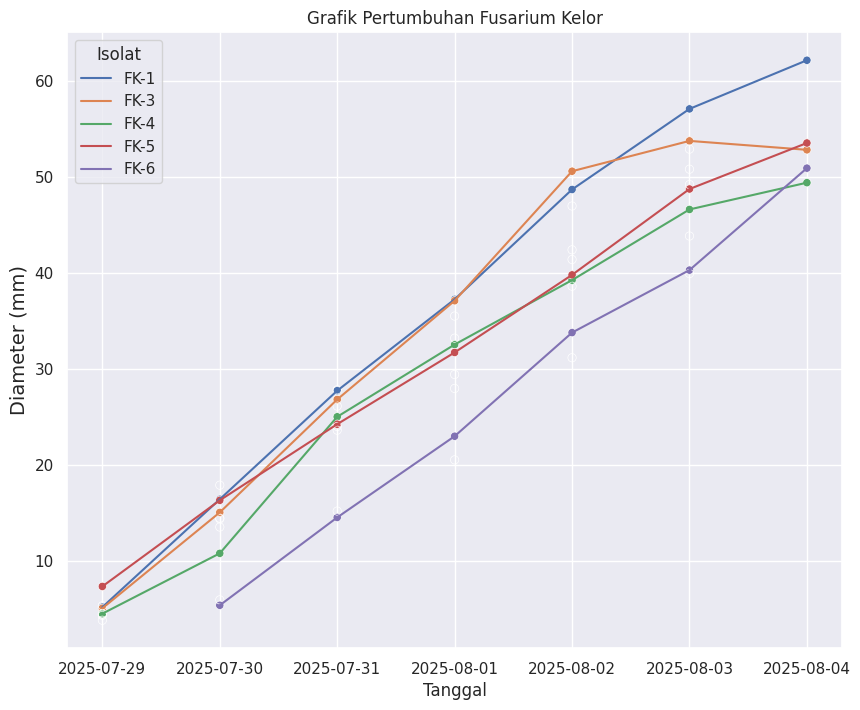

In [132]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.title("Grafik Pertumbuhan Fusarium Kelor")
plt.xlabel("Tanggal")
plt.ylabel("Diameter (mm)", size=14)
sns.set_theme("notebook")

sns.lineplot(data=df_final,
    x="tanggal",
    y="diameter",
    hue="isolat",
    hue_order=["FK-1", "FK-3", "FK-4", "FK-5", "FK-6"],
    ax=ax)

sns.scatterplot(data=df_final,
    x="tanggal",
    y="diameter",
    hue="isolat",
    hue_order=["FK-1", "FK-3", "FK-4", "FK-5", "FK-6"],
    legend=False,
    ax=ax)
ax.legend(title="Isolat")

plt.show()

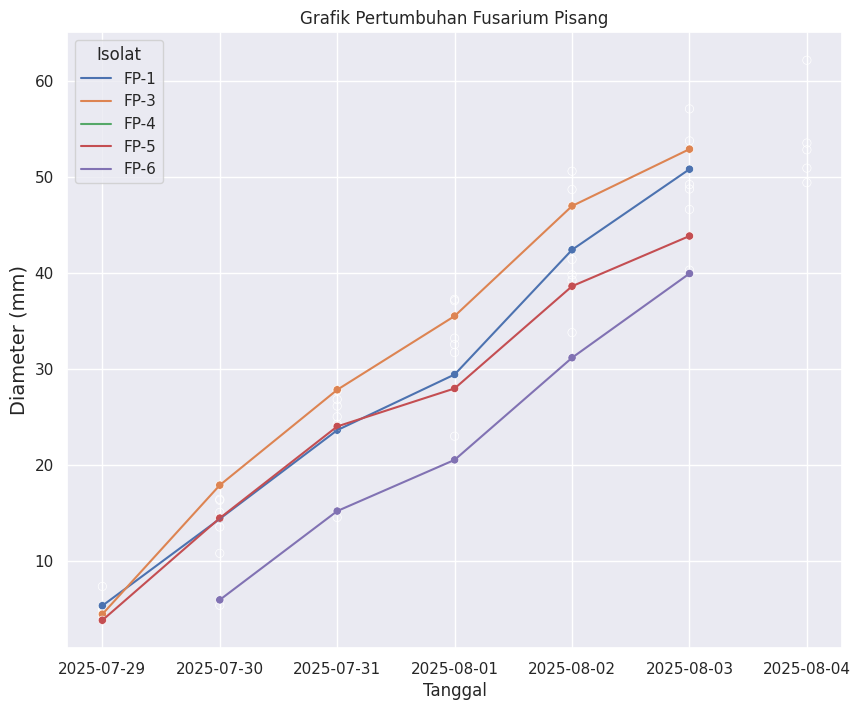

In [133]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.title("Grafik Pertumbuhan Fusarium Pisang")
plt.xlabel("Tanggal")
plt.ylabel("Diameter (mm)", size=14)
sns.set_theme("notebook")

sns.lineplot(data=df_final,
    x="tanggal",
    y="diameter",
    hue="isolat",
    hue_order=["FP-1", "FP-3", "FP-4", "FP-5", "FP-6"],
    ax=ax)

sns.scatterplot(data=df_final,
    x="tanggal",
    y="diameter",
    hue="isolat",
    hue_order=["FP-1", "FP-3", "FP-4", "FP-5", "FP-6"],
    legend=False,
    ax=ax)
ax.legend(title="Isolat")

plt.show()

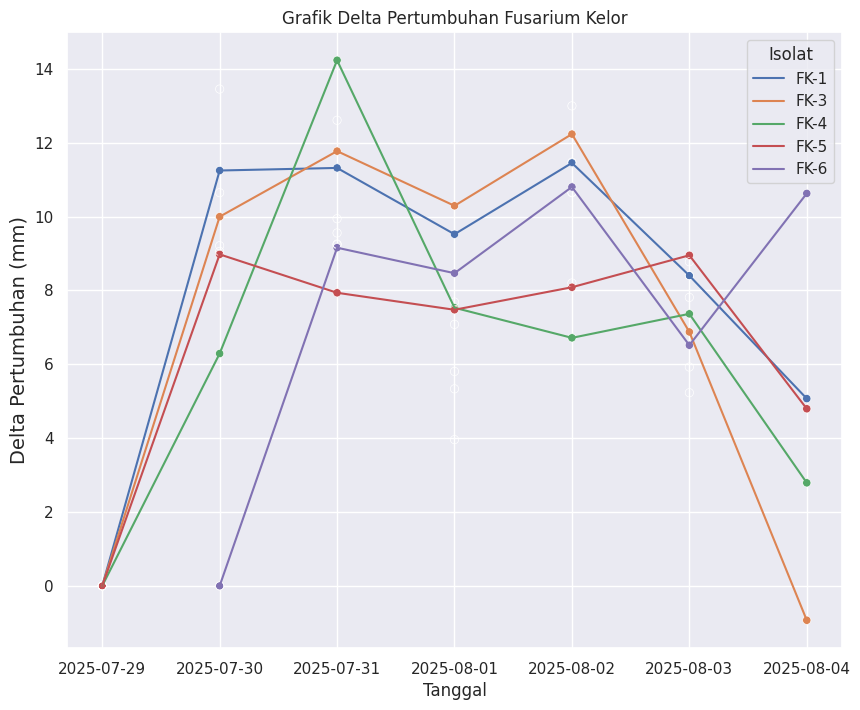

In [135]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.title("Grafik Delta Pertumbuhan Fusarium Kelor")
plt.xlabel("Tanggal")
plt.ylabel("Delta Pertumbuhan (mm)", size=14)
sns.set_theme("notebook")

sns.lineplot(data=df_final,
    x="tanggal",
    y="delta",
    hue="isolat",
    hue_order=["FK-1", "FK-3", "FK-4", "FK-5", "FK-6"],
    ax=ax)

sns.scatterplot(data=df_final,
    x="tanggal",
    y="delta",
    hue="isolat",
    hue_order=["FK-1", "FK-3", "FK-4", "FK-5", "FK-6"],
    legend=False,
    ax=ax)
ax.legend(title="Isolat")

plt.show()

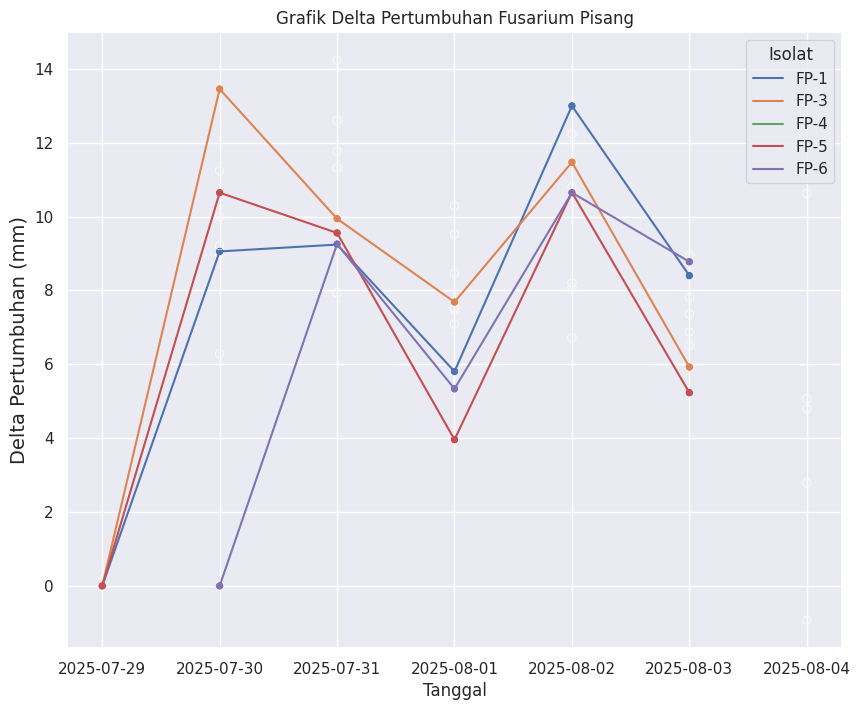

In [134]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.title("Grafik Delta Pertumbuhan Fusarium Pisang")
plt.xlabel("Tanggal")
plt.ylabel("Delta Pertumbuhan (mm)", size=14)
sns.set_theme("notebook")

sns.lineplot(data=df_final,
    x="tanggal",
    y="delta",
    hue="isolat",
    hue_order=["FP-1", "FP-3", "FP-4", "FP-5", "FP-6"],
    ax=ax)

sns.scatterplot(data=df_final,
    x="tanggal",
    y="delta",
    hue="isolat",
    hue_order=["FP-1", "FP-3", "FP-4", "FP-5", "FP-6"],
    legend=False,
    ax=ax)
ax.legend(title="Isolat")

plt.show()